In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_train=pd.read_csv('X_train.csv',header=None)
y_train=pd.read_csv('y_train.csv',header=None)
x_test=pd.read_csv('X_test.csv',header=None)
y_test=pd.read_csv('y_test.csv',header=None)

In [3]:
#calculating the mle estimates
pie_mle=(sum(y_train.iloc[:,0])/len(y_train))
def calculate_mle_param():
    params=[]
    for i in range(54):
        temp=[]
        x1=x_train.iloc[:,i].copy()
        var1=x1[y_train.iloc[:,0]==0]
        var1=(sum(var1)/len(var1))
        var2=x1[y_train.iloc[:,0]==1]
        var2=(sum(var2)/len(var2))
        temp.append(var1)
        temp.append(var2)
        params.append(temp)
    for i in range(54,57):
        temp=[]
        x1=x_train.iloc[:,i].copy()
        var1=x1[y_train.iloc[:,0]==0]
        var1=(len(y_train.iloc[:,0]==0)/sum(np.log(var1)))
        var2=x1[y_train.iloc[:,0]==1]
        var2=(len(y_train.iloc[:,0]==1)/sum(np.log(var2)))
        temp.append(var1)
        temp.append(var2)
        params.append(temp)
    
    return params

In [4]:
params=calculate_mle_param()

In [5]:
def naive_baiyes_predict(x):
    
    predict_zero=(1-pie_mle)
    predict_one=(pie_mle)
    
    for i in range(54):
        
        theta_variable=params[i][0]
        temp=(theta_variable**x[i])*((1-theta_variable)**(1-x[i]))
        predict_zero=predict_zero*temp
        
        theta_variable=params[i][1]
        temp=(theta_variable**x[i])*((1-theta_variable)**(1-x[i]))
        predict_one=predict_one*temp
        
    for i in range(54,57):
        
        theta_variable=params[i][0]
        temp=(theta_variable*(x[i]**(-theta_variable-1)))
        predict_zero=predict_zero*temp
        
        theta_variable=params[i][1]
        temp=(theta_variable*(x[i]**(-theta_variable-1)))
        predict_one=predict_one*temp
        
    if(predict_zero>predict_one):
        return 0
    else:
        return 1
    

In [6]:
predicted=x_test.apply( lambda x: naive_baiyes_predict(x) , axis=1)

In [7]:
(sum(predicted==y_test.iloc[:,0])/len(y_test))*100

93.548387096774192

In [8]:
predicted=(predicted)
actual=(y_test.iloc[:,0])
#both zero
print("0 actual 0 predicted")
x=predicted==actual
x=x[actual==0]
print(sum(x))

print("0 actual 1 predicted")
x=predicted!=actual
x=x[actual==0]
print(sum(x))


print("1 actual 0 predicted")
x=predicted!=actual
x=x[actual==1]
print(sum(x))


print("1 actual 1 predicted")
x=predicted==actual
x=x[actual==1]
print(sum(x))



0 actual 0 predicted
54
0 actual 1 predicted
2
1 actual 0 predicted
4
1 actual 1 predicted
33


In [9]:
params_df=pd.DataFrame(params)

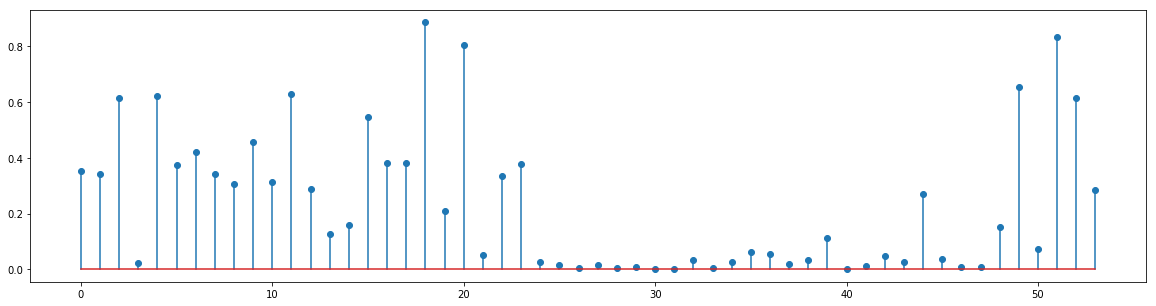

In [10]:
bernoulli=params_df.iloc[:54,1]
bernoulli=np.array(bernoulli)
plt.figure(figsize=(20,5))
plt.stem(bernoulli, color='r')
plt.show()

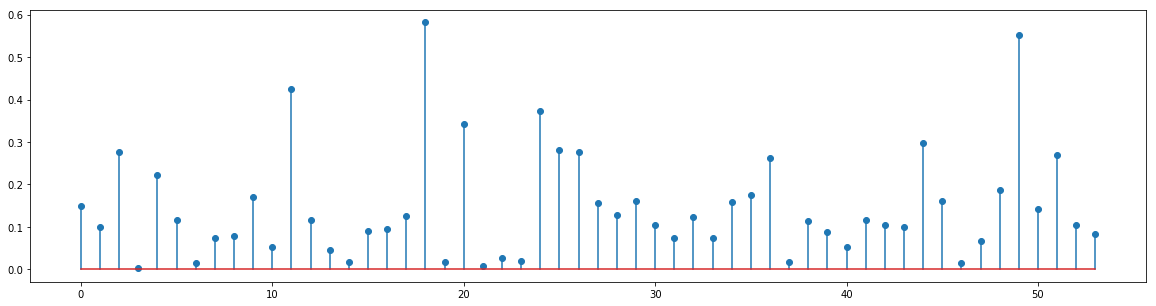

In [11]:
bernoulli=params_df.iloc[:54,0]
bernoulli=np.array(bernoulli)
plt.figure(figsize=(20,5))
plt.stem(bernoulli, color='r')
plt.show()

In [12]:
def logistic_regression_regular(X_train,Y_train,X_test,Y_test):
    X_train_new=X_train.copy()
    X_test_new=X_test.copy()
    Y_train_new=Y_train.copy()
    Y_test_new=Y_test.copy()

    X_train_new = np.column_stack((X_train_new,np.ones(X_train_new.shape[0])))
    X_test_new = np.column_stack((X_test_new,np.ones(X_test_new.shape[0])))

    Y_train_new[Y_train_new==0]=-1
    Y_test_new[Y_test_new==0]=-1

    weights = np.zeros(X_train_new.shape[1]).reshape(-1,1)

    def sigmoid(x):
        return 1/(1+np.exp(-x))

    iterations=10000
    objective = []
    for t in range(1,iterations+1):
        eta = 1/(1e5*np.sqrt(t+1))
        sigma_i = sigmoid(np.multiply(Y_train_new,X_train_new.dot(weights)))
        objective.append(np.sum(np.log(sigma_i+1e-10)))
        update = X_train_new.T.dot(np.multiply(Y_train_new,1-sigma_i))
        weights += eta*update


    predict_test = np.sign(X_test_new.dot(weights))
    accuracy = sum(predict_test==Y_test_new)/len(predict_test)
    print("Test set accuracy is",accuracy)

    plt.plot(range(1,iterations+1),objective)
    plt.xlabel('iterations')
    plt.ylabel('objective function')
    plt.show()



In [13]:
def logistic_regression_newton(X_train,Y_train,X_test,Y_test):
    X_train_new=X_train.copy()
    X_test_new=X_test.copy()
    Y_train_new=Y_train.copy()
    Y_test_new=Y_test.copy()

    X_train_new = np.column_stack((X_train_new,np.ones(X_train_new.shape[0])))
    X_test_new = np.column_stack((X_test_new,np.ones(X_test_new.shape[0])))

    Y_train_new[Y_train_new==0]=-1
    Y_test_new[Y_test_new==0]=-1

    weights = np.zeros(X_train_new.shape[1]).reshape(-1,1)

    def sigmoid(x):
        return 1/(1+np.exp(-x))

    iterations=100
    objective = []
    for t in range(1,iterations+1):
        eta = 1/np.sqrt(t+1)
        sigma_i = sigmoid(np.multiply(Y_train_new,X_train_new.dot(weights)))
        objective.append(np.sum(np.log(sigma_i+1e-10)))
        second_grad = -np.multiply(np.multiply(sigma_i,1-sigma_i),X_train_new).T.dot(X_train_new)
        first_grad = X_train_new.T.dot(np.multiply(Y_train_new,1-sigma_i))
        weights -= eta*np.linalg.inv(second_grad).dot(first_grad)


    predict_test = np.sign(X_test_new.dot(weights))
    accuracy = sum(predict_test==Y_test_new)/len(predict_test)
    print("Test set accuracy:",accuracy)


    plt.plot(range(1,iterations+1),objective)
    plt.xlabel('iterations')
    plt.ylabel('objective function')
    #plt.title(figtitle)
    plt.show()




In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


Test set accuracy is [ 0.68817204]


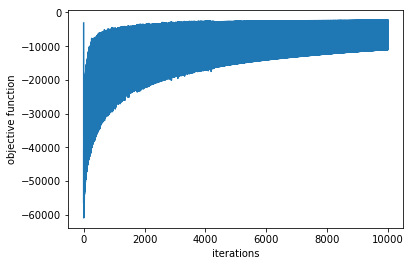

In [15]:
logistic_regression_regular(x_train,y_train,x_test,y_test)

Test set accuracy: [ 0.91397849]


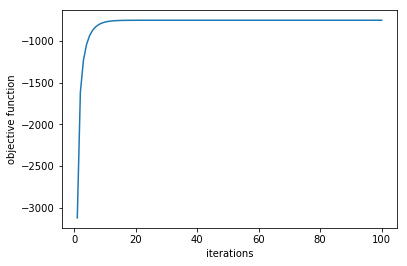

In [16]:
logistic_regression_newton(x_train,y_train,x_test,y_test)

In [17]:
y_test = np.squeeze(np.asarray(y_test))
def predict(X_train, y_train, x_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        distance = np.sum(np.abs(x_test - X_train[i, :]))
        distances.append([distance, i])

    distances = sorted(distances)
    
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    if(np.mean(targets)>=0.5):
        return 1
    else:
        return 0

In [18]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):

    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))


In [19]:
knn_accuracy=[]
for k in range(1,21):
    predictions = []

    kNearestNeighbor(x_train, y_train, x_test, predictions, k)
    predictions = np.asarray(predictions)

    accuracy = (sum(y_test==predictions)/len(predictions))*100
    knn_accuracy.append(accuracy)


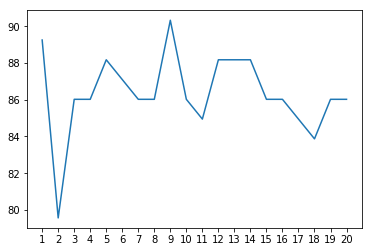

In [20]:
k_values=[i for i in range(1,21)]
knn_accuracy=pd.Series(knn_accuracy,index=k_values)
plt.figure()
plt.plot(knn_accuracy)
plt.xticks(k_values)
plt.show()